# Homework 1 Part 2 Solutions
---

In [1]:
# import all libraries and magics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Problem 1

Consider the diabetes data:

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(return_X_y=False)
# print(diabetes.DESCR)

This dataset is already described in the **feature space**. Each input sample $x_i$ is described as 10-dimensional feature vctor $\phi(x_i)$. The features correspond to: age, sex, bmi, bp, s1, s2, s3, s4, s5 and s6 measurements (read the description above for more details). The target variable corresponds a measure of diabetes disease progression one year after baseline.

Let's load the data as a ```pandas``` dataframe:

In [3]:
import numpy as np

df_diabetes = pd.DataFrame(data=np.hstack((diabetes.target[:,np.newaxis],diabetes.data)), 
                  columns=['Target']+diabetes.feature_names)

df_diabetes

,Target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...,...
437,178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,132.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  442 non-null    float64
 1   age     442 non-null    float64
 2   sex     442 non-null    float64
 3   bmi     442 non-null    float64
 4   bp      442 non-null    float64
 5   s1      442 non-null    float64
 6   s2      442 non-null    float64
 7   s3      442 non-null    float64
 8   s4      442 non-null    float64
 9   s5      442 non-null    float64
 10  s6      442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


The goal is to fit a linear regression model on the provided features, i.e., the model is of the form:

$$y(x) = w_0 + w_1\phi_1(x) + w_2\phi_2(x) + w_3\phi_3(x) + \dots + w_{10}\phi_{10}(x)$$

where $w_0$ is the bias (or intercept) coefficient and all other $w_i, i=1,\dots,10$ correspond to the coefficient associated with feature $\phi_i$ (age, sex, bmi, bp, etc.).

## Questions

1. Randomly partition the data into training (70%) and test sets (30%).

2. Use a 5-fold cross-validation strategy to determine the hyperparameter values to fit a linear regression model with ridge regularization for this dataset. Show and document your work.

3. Evaluate performance in the test set.

4. Determine the final value for the intercept and coefficients of the linear regression model. Plot all 11 values as a ```stem``` plot. 

5. Based on this plot, which input variable (also referred to the independent variable) has the most contribution for predicting the target variable (also referred to the dependent variable)?

In [5]:
from sklearn.model_selection import train_test_split

# Partition the data into training/test sets
train, test = train_test_split(df_diabetes, 
                               test_size=0.3, 
                               shuffle=True,
                              random_state=42)

In [6]:
train

,Target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
225,208.0,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063017,0.003064
412,261.0,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006209,0.085907
118,179.0,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020612,0.056912
114,258.0,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099240,0.023775
364,262.0,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014823,0.098333
...,...,...,...,...,...,...,...,...,...,...,...
106,134.0,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059473,-0.083920
270,202.0,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008640,0.015491
348,148.0,0.030811,-0.044642,-0.020218,-0.005671,-0.004321,-0.029497,0.078093,-0.039493,-0.010904,-0.001078
435,64.0,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357


In [7]:
test

,Target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,219.0,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032433,-0.005220
211,70.0,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022512,-0.021788
72,202.0,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084495,-0.017646
321,230.0,0.096197,-0.044642,0.051996,0.079254,0.054845,0.036577,-0.076536,0.141322,0.098646,0.061054
73,111.0,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005145,-0.009362
...,...,...,...,...,...,...,...,...,...,...,...
238,257.0,0.034443,0.050680,-0.009439,0.059744,-0.035968,-0.007577,-0.076536,0.071210,0.011008,-0.021788
26,137.0,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042572,-0.005220
7,63.0,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
401,93.0,0.016281,-0.044642,-0.045007,-0.057314,-0.034592,-0.053923,0.074412,-0.076395,-0.042572,0.040343


In [8]:
# Extract training data and labels into 2 variables for both training and test sets

X_train = train[train.columns[1:]].to_numpy()
t_train = train['Target'].to_numpy()

X_test = test[test.columns[1:]].to_numpy()
t_test = test['Target'].to_numpy()

X_train.shape, t_train.shape, X_test.shape, t_test.shape

((309, 10), (309,), (133, 10), (133,))

In [9]:
# Scale the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [10]:
# Appending the bias column (vector of 1s) to the feature matrix

X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))

X_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))

X_train.shape, X_test.shape

((309, 11), (133, 11))

In [11]:
## Helper functions

def RidgeRegression(X,t,lam):
    '''Fit a ridge regression model on provided feature matrix X and target vector t'''
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X + lam*np.eye(X.shape[1]))@X.T@t
    # Compute model prediction
    y = X@w
    return w, y

def LinearRegression_test(X,w):
    '''Linear regression model prediction'''
    # Prediction for test set
    y = X@w
    
    return y

In [12]:
from sklearn.model_selection import KFold

In [13]:
# Set of values for lambda to explore
lam_vals= np.arange(0.01,1.1,0.01)

# Cross-validation object
k = 5 # number of folds
kf = KFold(n_splits=k,shuffle=True)

# Initialize parameters
min_mse = 10**10
lam_best = 0

for lam in lam_vals:
#     print('Lambda Value = ',lam)

    # For each training/validation split
    f=1

    #initialize performance measures
    MSE_train_avg,MSE_val_avg = 0, 0

    for train_index, validation_index in kf.split(X_train):
#         print('\nFold ',f)

        # Select training set using the indices found from kf.split
        X_train2, X_validation = X_train[train_index], X_train[validation_index]

        # Select validation set using the indices found from kf.split
        t_train2, t_validation = t_train[train_index], t_train[validation_index]

        # Training model with training set
        w, y_train = RidgeRegression(X_train2, t_train2, lam)

        # Evaluate trained model in validation set
        y_val = LinearRegression_test(X_validation, w)

        # Performance Measure
        MSE_train = np.mean((t_train2-y_train)**2)
        MSE_val   = np.mean((t_validation-y_val)**2)

        # Average performance measure
        MSE_train_avg = MSE_train_avg+MSE_train
        MSE_val_avg = MSE_val_avg+MSE_val
#         print('MSE Training = ', MSE_train)
#         print('MSE Validation = ', MSE_val)
        f+=1

#     print('\nAverage Performance in Training = ', MSE_train_avg/k)
#     print('Average Performance in Validation = ', MSE_val_avg/k)
#     print('-----------------------------------------------------\n')
    
    if MSE_val_avg/k < min_mse:
        lam_best = lam
        min_mse = MSE_val_avg/k
        
print('The lambda chosen is ' + str(lam_best) + ', with an average MSE value of ' + str(min_mse))

The lambda chosen is 0.6, with an average MSE value of 3062.7048268696585


In [14]:
# Train the final model

w, y_train = RidgeRegression(X_train, t_train, lam_best)

In [15]:
# Evaluate the model in test set

y_test = LinearRegression_test(X_test, w)

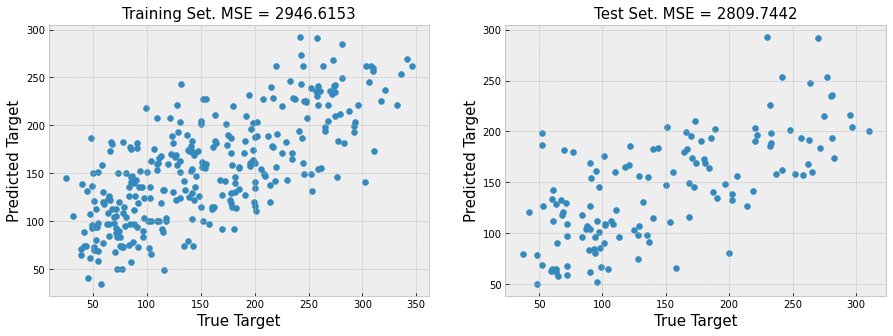

In [16]:
# Evaluate performance in train/test sets
MSE_train = np.mean((t_train-y_train)**2)
MSE_test = np.mean((t_test-y_test)**2)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(t_train, y_train)
plt.title('Training Set. MSE = '+str(np.round(MSE_train,4)), size=15)
plt.xlabel('True Target', size=15); plt.ylabel('Predicted Target', size=15)
plt.subplot(1,2,2)
plt.scatter(t_test, y_test)
plt.xlabel('True Target', size=15); plt.ylabel('Predicted Target', size=15)
plt.title('Test Set. MSE = '+str(np.round(MSE_test,4)), size=15);

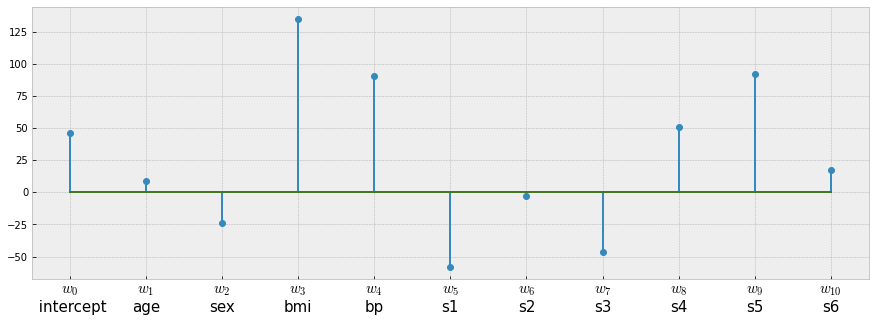

In [17]:
plt.figure(figsize=(15,5))
plt.stem(w)
plt.xticks(range(len(w)), ['$w_0$\n intercept']+
           ['$w_{'+str(x)+'}$\n'+df_diabetes.columns[x] for x in range(1,len(w))], size=15);

Based on this plot, we can see that the feature bmi and s5 (followed by bp, s1 and s4) have the largest coefficient (in the absolute sense), thus they contribute the most to the model prediction.

___

# Problem 2

Suppose that a taxi company wants to estimate the average number of trips per hour for the upcoming weekend in Downtown Gainesville. The company is working under the assumption that the number of passengers can be modeled with a Poisson random variable (RV) with parameter $\lambda$ ($\lambda>0$).

* The poisson RV with parameter $\lambda$ has the following probability mass function (PMF): $p(x) = \frac{\lambda^x e^{-\lambda}}{x!}$.

The company's engineers decide to use a Gamma RV with parameters $\alpha=5$ and $\beta=0.5$ as the prior probability for the unknown parameter $\lambda$.

* The Gamma RV with parameters $\alpha$ and $\beta$ ($\alpha,\beta>0$) has the following probability density function: $f(\lambda)=\frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}$.

Suppose that you have a set of data with 10 samples:
\begin{align*}
x=[12,  5, 10, 10,  7, 17, 6, 11, 9, 9]
\end{align*}

Answer the following questions:

1. Compute the MLE estimate for $\lambda$. Show all your work.

2. Compute the MAP estimate for $\lambda$. Show all your work.

3. Does Poisson-Gamma form a prior conjugate relationship? Provide the pseudo-code for online update of the prior parameters.

4. Suppose the dataset ```hourly_trips.npy``` is the dataset coming in hourly (one sample at a time). Use this data to perform online update of the prior parameters. Start with an initial guess of $\alpha=3$ and $\beta=1$. Include a plot showing the estimated value for $\lambda$ (using MLE and MAP) as data samples are received. (The true value is $\lambda=10$.)

### 1. MLE Estimate

The data likelihood is given by:

\begin{align*}
\mathcal{L}^0 = \prod_{i=1}^N \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}
\end{align*}

We want to find $\lambda$ such that: $\lambda = \arg_{\lambda}\max \mathcal{L}^0$. We can take the log-likelihood to simplify derivatives. The log-likelihood is then given by:

\begin{align*}
\mathcal{L} &= \ln \mathcal{L}^0\\
&= \ln \prod_{i=1}^N \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}\\
&= \sum_{i=1}^N \left(x_i \ln(\lambda) -\lambda - \ln(x_i!)\right)
\end{align*}

Now, we can take the derivative with respect to (wrt) $\lambda$, set it equal to zero, and solve for $\lambda$.

\begin{align*}
\frac{\partial\mathcal{L}}{\partial\lambda} &= 0\\
\frac{\sum_{i=1}^N x_i}{\lambda} -N &= 0\\
\lambda &= \frac{\sum_{i=1}^N x_i}{N}
\end{align*}

The MLE estimate for $\lambda$, as expected, is the expected value of the log-likelihood: $\lambda_{\text{MLE}} =  \frac{\sum_{i=1}^N x_i}{N}$.

For the provided data, the MLE estimate for $\lambda$ is 9.6.

In [18]:
x = [12,  5, 10, 10,  7, 17, 6, 11, 9, 9]

In [19]:
np.mean(x)

9.6

### 2. MAP Estimate

The posterior probability is proportional to the data likelihood times the prior probability:

\begin{align*}
\mathcal{L}^0 &= \left(\prod_{i=1}^N \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}\right)\frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}\\
&= \left(\prod_{i=1}^N \frac{1}{x_i!}\right) \lambda^{\sum_{i=1}^N x_i} e^{-N\lambda}\frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}\\
\end{align*}

Since we are solving a similar optimization problem, i.e., $\lambda = \arg_{\lambda}\max \mathcal{L}^0$, we can discard constant terms:

\begin{align*}
\mathcal{L}^0 &= \left(\prod_{i=1}^N \frac{1}{x_i!}\right) \lambda^{\sum_{i=1}^N x_i} e^{-N\lambda}\frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}\\
&\propto \lambda^{\sum_{i=1}^N x_i + \alpha-1} e^{-(\beta+N)\lambda}\\
\end{align*}

Taking the log-likelihood:

\begin{align*}
\mathcal{L} &= \ln \mathcal{L}^0\\
&= \left(\sum_{i=1}^N x_i + \alpha-1\right) \ln(\lambda) - (\beta+N)\lambda
\end{align*}

Now, we can take the derivative with respect to (wrt) $\lambda$, set it equal to zero, and solve for $\lambda$.

\begin{align*}
\frac{\partial\mathcal{L}}{\partial\lambda} &= 0\\
\frac{\sum_{i=1}^N x_i + \alpha-1}{\lambda} - (\beta+N) &= 0\\
\lambda &= \frac{\sum_{i=1}^N x_i + \alpha-1}{\beta+N}
\end{align*}

The MAP estimate for $\lambda$, as expected, is the expected value of the log-likelihood: $\lambda_{\text{MAP}} = \frac{\sum_{i=1}^N x_i + \alpha-1}{\beta+N}$.

For the provided data, the MAP estimate for $\lambda$ is 9.5238.

In [20]:
a = 5
b = 0.5

(np.sum(x)+a-1)/(b+len(x))

9.523809523809524

#### 3. Pseudo-Code

The **posterior** and the **prior** probability have the same shape, hence they have a **<font color='blue'>conjugate prior</font>** relationship. The pseudo-code for updated the prior is as follows:

1. Iteration $t=0$
2. Initialize the parameters of the prior probability, $\alpha^{(t)}$ and $\beta^{(t)}$
3. As data comes in:
    1. Compute the posterior probability, $\mathcal{L}_{\text{MAP}}^{(t)} = P(\mathbf{x}|\mu)P(\mu|\alpha^{(t)},\beta^{(t)})$
    2. Make an estimate for the parameter, $\mu_{\text{MAP}}^{(t)}$
    3. Update parameters of prior probability:
    \begin{align*}
    \alpha^{(t+1)} &\leftarrow \alpha^{(t)} + \sum_{i=1}^N x_i\\
    \beta^{(t+1)} &\leftarrow \beta^{(t)} + N
    \end{align*}
    4. $t \leftarrow t + 1$

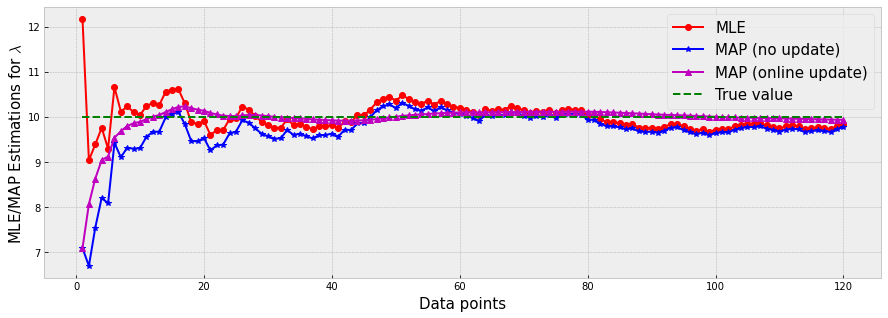

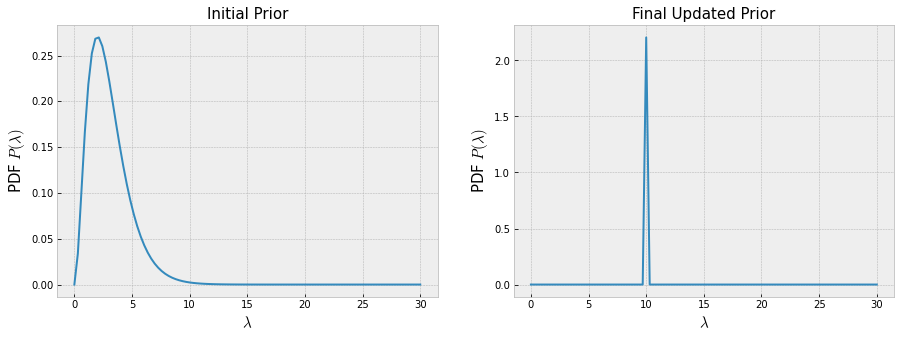

In [22]:
from scipy import stats

# Loading data
data = np.load('hourly_trips.npy')
N = len(data)

# Prior Probability parameters
a = 3; a_init = a
b = 1;  b_init = b

# Computing MLE and MAP estimates as data is being collected
mu_MLE = []
mu_MAP = []
mu_MAP_update = []
for i in range(1,N+1):
    mu_MLE += [np.sum(data[:i])/len(data[:i])]
    mu_MAP += [(np.sum(data[:i])+a_init-1)/(len(data[:i])+b_init)]
    mu_MAP_update += [(np.sum(data[:i])+a-1)/(len(data[:i])+b)]
    a += np.sum(data[:i])
    b += len(data[:i])

# Plotting estimates
plt.figure(figsize=(15,5))
plt.plot(range(1,N+1), mu_MLE, '-or', label='MLE')
plt.plot(range(1,N+1), mu_MAP, '-*b', label='MAP (no update)')
plt.plot(range(1,N+1), mu_MAP_update, '-^m', label='MAP (online update)')
plt.plot(range(1,N+1), [10]*N, '--g', label='True value')
plt.xlabel('Data points',size=15)
plt.ylabel('MLE/MAP Estimations for $\lambda$',size=15)
plt.legend(fontsize=15)
plt.show();

# Plotting Initial and Final Update Prior
x=np.linspace(0,30,100)
Gamma_initial = stats.gamma(a= a_init, scale=1/b_init)
Gamma_updated = stats.gamma(a=a, scale=1/b)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(x, Gamma_initial.pdf(x)); plt.title('Initial Prior', size=15)
plt.xlabel('$\lambda$',size=15); plt.ylabel('PDF $P(\lambda)$',size=15)
plt.subplot(1,2,2)
plt.plot(x, Gamma_updated.pdf(x)); plt.title('Final Updated Prior', size=15)
plt.xlabel('$\lambda$',size=15); plt.ylabel('PDF $P(\lambda)$',size=15);

As you can see from the first plot, the online update using the conjugate prior relationship has sped the convergence of the parameter estimation to the true value ($\lambda=10$).

In addition, from the last plot, we see that the initial prior (on the left) the density at $\lambda=10$ (the true value) is almost 0. But the final update prior (figure on the right) is much sharper around the true value with less uncertainty.

___
